In [1]:
# Library yang dibutuhkan

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import glob
import time
import cv2
import os

%matplotlib inline

In [2]:
# Panggil Dataset (Data Latih)
# Urutan Data Ikan
# komet
dir_komet = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/training-data/komet/*.jpg"
dir_maanfish = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/training-data/maanfish/*.jpg"
dir_molly = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/training-data/molly/*.jpg"
dir_redfine = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/training-data/redfine/*.jpg"
dir_zebra = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/training-data/zebra/*.jpg"

files = glob.glob(dir_komet)
komet = []
for f1 in files:
    img = cv2.imread(f1)
    komet.append(img)
    
files = glob.glob(dir_maanfish)
maanfish = []
for f1 in files:
    img = cv2.imread(f1)
    maanfish.append(img)
    
files = glob.glob(dir_molly)
molly = []
for f1 in files:
    img = cv2.imread(f1)
    molly.append(img)
    
files = glob.glob(dir_redfine)
redfine = []
for f1 in files:
    img = cv2.imread(f1)
    redfine.append(img)
    
files = glob.glob(dir_zebra)
zebra = []
for f1 in files:
    img = cv2.imread(f1)
    zebra.append(img)

# Panggil Dataset (Data Uji)
dir_komet_uji = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/testing-data/komet/*.jpg"
dir_maanfish_uji = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/testing-data/maanfish/*.jpg"
dir_molly_uji = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/testing-data/molly/*.jpg"
dir_redfine_uji = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/testing-data/redfine/*.jpg"
dir_zebra_uji = "C:/Users/HP/OneDrive/Documents/kcb/Dataset100px/Dataset/testing-data/zebra/*.jpg"

files = glob.glob(dir_komet_uji)
komet_uji = []
for f1 in files:
    img = cv2.imread(f1)
    komet_uji.append(img) 

files = glob.glob(dir_maanfish_uji)
maanfish_uji = []
for f1 in files:
    img = cv2.imread(f1)
    maanfish_uji.append(img)
    
files = glob.glob(dir_molly_uji)
molly_uji = []
for f1 in files:
    img = cv2.imread(f1)
    molly_uji.append(img)
    
files = glob.glob(dir_redfine_uji)
redfine_uji = []
for f1 in files:
    img = cv2.imread(f1)
    redfine_uji.append(img)
    
files = glob.glob(dir_zebra_uji)
zebra_uji = []
for f1 in files:
    img = cv2.imread(f1)
    zebra_uji.append(img) 

In [3]:
# Membuat fungsi untuk mengubah ukuran gambar menjadi ukuran yang seragam
def resize_images(images, target_size):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img)
    return resized_images

# Menyesuaikan ukuran gambar-gambar menjadi ukuran yang seragam
target_size = (300, 400)  # Atur ukuran target sesuai kebutuhan Anda
komet_resized = resize_images(komet, target_size)
maanfish_resized = resize_images(maanfish, target_size)
molly_resized = resize_images(molly, target_size)
redfine_resized = resize_images(redfine, target_size)
zebra_resized = resize_images(zebra, target_size)

# Mengubah list gambar yang telah diubah ukurannya menjadi array numpy
komet_array = np.array(komet_resized)
maanfish_array = np.array(maanfish_resized)
molly_array = np.array(molly_resized)
redfine_array = np.array(redfine_resized)
zebra_array = np.array(zebra_resized)

In [4]:
# Cek ukuran Data latih
[komet_array.shape, maanfish_array.shape, molly_array.shape, redfine_array.shape, zebra_array.shape]

[(10, 400, 300, 3),
 (10, 400, 300, 3),
 (10, 400, 300, 3),
 (10, 400, 300, 3),
 (10, 400, 300, 3)]

In [5]:
# Fungsi untuk mengubah ukuran gambar menjadi ukuran yang seragam
def resize_images(images, target_size):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img)
    return resized_images

# Fungsi untuk memuat dan mengubah ukuran gambar dari direktori tertentu
def load_and_resize_images(image_dir, target_size):
    files = glob.glob(image_dir)
    images = []
    for f1 in files:
        img = cv2.imread(f1)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            images.append(resized_img)
    return images

# Tentukan ukuran target
target_size = (400, 300)  # Misalnya, ubah ukuran semua gambar menjadi 100x100

# Muat dan ubah ukuran gambar
komet_uji = load_and_resize_images(dir_komet_uji, target_size)
maanfish_uji = load_and_resize_images(dir_maanfish_uji, target_size)
molly_uji = load_and_resize_images(dir_molly_uji, target_size)
redfine_uji = load_and_resize_images(dir_redfine_uji, target_size)
zebra_uji = load_and_resize_images(dir_zebra_uji, target_size)

# Konversi ke array numpy
komet_array = np.array(komet_uji)
maanfish_array = np.array(maanfish_uji)
molly_array = np.array(molly_uji)
redfine_array = np.array(redfine_uji)
zebra_array = np.array(zebra_uji)


In [6]:
# Cek ukuran Data Uji
shapes = [array.shape for array in [komet_array, maanfish_array, molly_array, redfine_array, zebra_array]]
print(shapes)

[(5, 300, 400, 3), (5, 300, 400, 3), (5, 300, 400, 3), (5, 300, 400, 3), (5, 300, 400, 3)]


In [7]:
# Data Latih semua jenis ikan digabung
X = np.vstack((komet_array, maanfish_array, molly_array, redfine_array, zebra_array)).astype(np.float32)

In [8]:
# Cek ukuran Data Latih setelah digabung
X.shape

(25, 300, 400, 3)

In [9]:
# Tampilkan sebelum dinormalisasi
print(X)

[[[[  2.   0.   0.]
   [  2.   0.   0.]
   [  2.   0.   0.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  [[  2.   0.   0.]
   [  2.   0.   0.]
   [  2.   0.   0.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  [[  2.   0.   0.]
   [  2.   0.   0.]
   [  2.   0.   0.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  ...

  [[ 77.  79.  79.]
   [ 77.  79.  79.]
   [ 78.  79.  79.]
   ...
   [112. 114. 114.]
   [112. 114. 114.]
   [112. 114. 114.]]

  [[ 77.  79.  79.]
   [ 77.  79.  79.]
   [ 78.  80.  80.]
   ...
   [110. 112. 112.]
   [110. 112. 112.]
   [110. 112. 112.]]

  [[ 77.  79.  79.]
   [ 77.  79.  79.]
   [ 78.  80.  80.]
   ...
   [110. 112. 112.]
   [110. 112. 112.]
   [110. 112. 112.]]]


 [[[113.  58.   7.]
   [113.  58.   7.]
   [113.  58.   7.]
   ...
   [131.  68.   9.]
   [131.  69.   9.]
   [131.  69.   9.]]

  [[113.  58.   7.]
   [113.  58.   7.]
   [113.  58.   7.]
   ...
   [130.  69.   9.]
 

In [10]:
# Data Latih semua jenis ikan Dinormalisasi
X = X / 255.0

In [11]:
X.shape

(25, 300, 400, 3)

In [12]:
len(komet)

10

In [13]:
# Tampilkan setelah dinormalisasi
print(X)

[[[[0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  ...

  [[0.3019608  0.30980393 0.30980393]
   [0.3019608  0.30980393 0.30980393]
   [0.30588236 0.30980393 0.30980393]
   ...
   [0.4392157  0.44705883 0.44705883]
   [0.4392157  0.44705883 0.44705883]
   [0.4392157  0.44705883 0.44705883]]

  [[0.3019608  0.30980393 0.30980393]
   [0.3

In [14]:
# Data Uji semua jenis ikan digabung
X_uji = np.vstack((komet_uji, maanfish_uji, molly_uji, redfine_uji, zebra_uji))

In [15]:
# Cek ukuran Data Uji
X_uji.shape

(25, 300, 400, 3)

In [16]:
# Data Uji sebelum dinormalisasi
print(X_uji)

[[[[  2   0   0]
   [  2   0   0]
   [  2   0   0]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  2   0   0]
   [  2   0   0]
   [  2   0   0]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  2   0   0]
   [  2   0   0]
   [  2   0   0]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  ...

  [[ 77  79  79]
   [ 77  79  79]
   [ 78  79  79]
   ...
   [112 114 114]
   [112 114 114]
   [112 114 114]]

  [[ 77  79  79]
   [ 77  79  79]
   [ 78  80  80]
   ...
   [110 112 112]
   [110 112 112]
   [110 112 112]]

  [[ 77  79  79]
   [ 77  79  79]
   [ 78  80  80]
   ...
   [110 112 112]
   [110 112 112]
   [110 112 112]]]


 [[[113  58   7]
   [113  58   7]
   [113  58   7]
   ...
   [131  68   9]
   [131  69   9]
   [131  69   9]]

  [[113  58   7]
   [113  58   7]
   [113  58   7]
   ...
   [130  69   9]
   [131  69   9]
   [131  69   9]]

  [[113  58   7]
   [113  58   7]
   [113  58   7]
   ...
   [131  68   9]
   [131  69   9]
   [131  69

In [17]:
# Data Uji semua jenis ikan Dinormalisasi
X_uji = X_uji / 255.0

In [18]:
# Cek setelah dinormalisasi
print(X_uji)

[[[[0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  ...

  [[0.30196078 0.30980392 0.30980392]
   [0.30196078 0.30980392 0.30980392]
   [0.30588235 0.30980392 0.30980392]
   ...
   [0.43921569 0.44705882 0.44705882]
   [0.43921569 0.44705882 0.44705882]
   [0.43921569 0.44705882 0.44705882]]

  [[0.30196078 0.30980392 0.30980392]
   [0.3

In [19]:
# Label ikan Data Latih
label_komet = np.array([0, 0, 0, 0, 0])
label_maanfish = np.array([1, 1, 1, 1, 1])
label_molly = np.array([2, 2, 2, 2, 2])
label_redfine = np.array([3, 3, 3, 3, 3])
label_zebra = np.array([4, 4, 4, 4, 4])

In [20]:
# Cek ukuran label Data Latih
[np.shape(label_komet), np.shape(label_maanfish), np.shape(label_molly), np.shape(label_redfine), np.shape(label_zebra)]

[(5,), (5,), (5,), (5,), (5,)]

In [21]:
# Semua Label Ikan Data Latih digabung
y = np.hstack((label_komet, label_maanfish, label_molly, label_redfine, label_zebra))

In [22]:
# Cek ukuran label ikan Data Latih
y.shape

(25,)

In [23]:
# Label ikan Data Uji
label_komet_uji = np.array([0, 0])
label_maanfish_uji = np.array([1, 1])
label_molly_uji = np.array([2, 2])
label_redfine_uji = np.array([3, 3])
label_zebra_uji = np.array([4, 4])

In [24]:
# Cek ukuran label Data Uji
[np.shape(label_komet_uji), np.shape(label_maanfish_uji), np.shape(label_molly_uji), np.shape(label_redfine_uji), np.shape(label_zebra_uji)]

[(2,), (2,), (2,), (2,), (2,)]

In [25]:
# Semua Label Ikan Data Uji digabung
y_uji = np.hstack((label_komet_uji, label_maanfish_uji, label_molly_uji, label_redfine_uji, label_zebra_uji))

In [26]:
# Cek ukuran label ikan Data Uji
y_uji.shape

(10,)

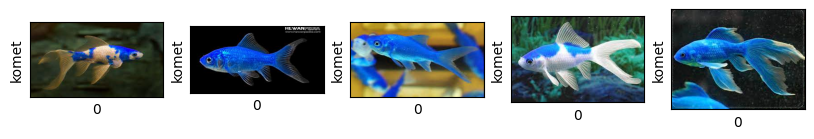

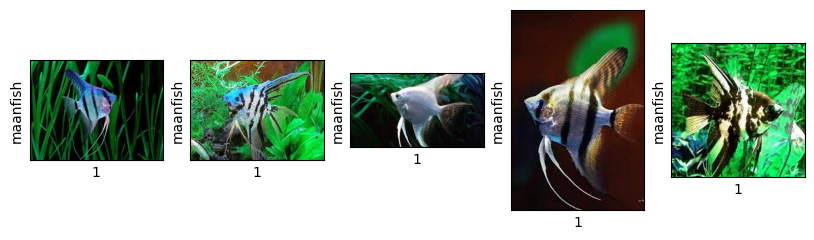

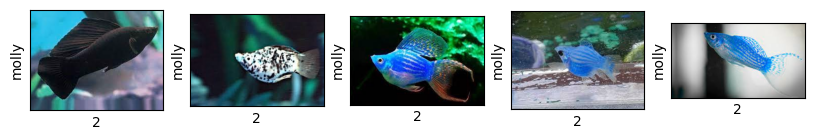

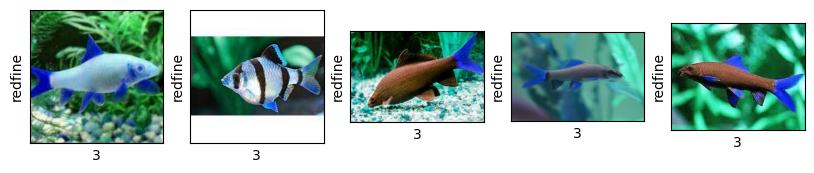

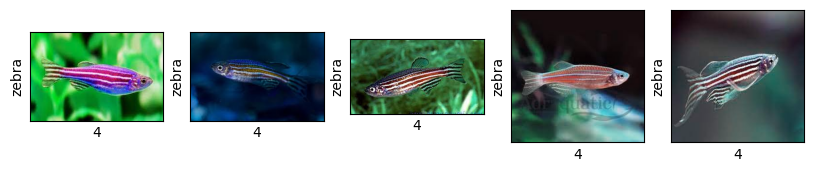

In [27]:
# Tampilkan sampel Data Latih
class_names = ['komet', 'maanfish','molly','redfine','zebra']
plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(1,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(komet[i], cmap=plt.cm.binary)
 plt.xlabel(label_komet[i])
 plt.ylabel(class_names[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(2,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(maanfish[i], cmap=plt.cm.binary)
 plt.xlabel(label_maanfish[i])
 plt.ylabel(class_names[1])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(3,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(molly[i], cmap=plt.cm.binary)
 plt.xlabel(label_molly[i])
 plt.ylabel(class_names[2])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(4,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(redfine[i], cmap=plt.cm.binary)
 plt.xlabel(label_redfine[i])
 plt.ylabel(class_names[3])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(zebra[i], cmap=plt.cm.binary)
 plt.xlabel(label_zebra[i])
 plt.ylabel(class_names[4])
plt.show()

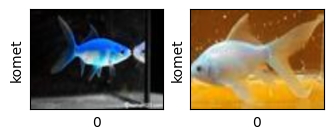

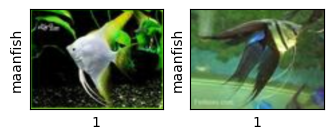

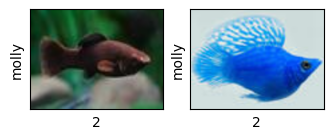

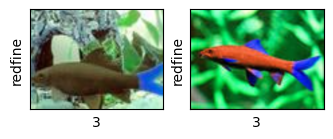

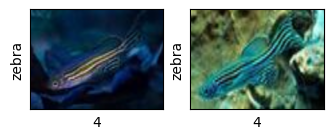

In [28]:
# Tampilkan sampel Data Uji
class_names = ['komet', 'maanfish','molly','redfine','zebra']
plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(1,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(komet_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_komet_uji[i])
 plt.ylabel(class_names[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(2,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(maanfish_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_maanfish_uji[i])
 plt.ylabel(class_names[1])
plt.show()

plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(3,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(molly_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_molly_uji[i])
 plt.ylabel(class_names[2])
plt.show()

plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(4,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(redfine_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_redfine_uji[i])
 plt.ylabel(class_names[3])
plt.show()

plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(zebra_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_zebra_uji[i])
 plt.ylabel(class_names[4])
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(300, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Menampilkan arsitektur model CNN
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 398, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 199, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 197, 200)  │       180,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 98, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 96, 200)    │       360,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 48, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 46, 200)    │       360,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 23, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 21, 200)    │       360,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,263,600 (4.82 MB)

 Trainable params: 1,263,600 (4.82 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(5))

In [32]:
# menampilkan arsitektur lengkap model CNN
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 398, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 199, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 197, 200)  │       180,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 98, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 96, 200)    │       360,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 48, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 46, 200)    │       360,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 23, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 21, 200)    │       360,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 58800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │    11,760,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,024,805 (49.69 MB)

 Trainable params: 13,024,805 (49.69 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
print(f"Ukuran X: {X.shape}")
print(f"Ukuran y: {y.shape}")

Ukuran X: (25, 300, 400, 3)
Ukuran y: (25,)


In [34]:
# Asumsikan X dan y adalah numpy array atau pandas dataframe
import numpy as np

# Tentukan jumlah sampel terkecil antara X dan y
min_samples = min(X.shape[0], y.shape[0])

# Potong data agar memiliki jumlah sampel yang sama
X = X[:min_samples]
y = y[:min_samples]

# Periksa ukuran data kembali
print(f"Ukuran X setelah perbaikan: {X.shape}")
print(f"Ukuran y setelah perbaikan: {y.shape}")


Ukuran X setelah perbaikan: (25, 300, 400, 3)
Ukuran y setelah perbaikan: (25,)


In [35]:
# Periksa ukuran data uji
print(f"Ukuran X_uji: {X_uji.shape}")
print(f"Ukuran y_uji: {y_uji.shape}")

# Potong data uji agar memiliki jumlah sampel yang sama
min_test_samples = min(X_uji.shape[0], y_uji.shape[0])
X_uji = X_uji[:min_test_samples]
y_uji = y_uji[:min_test_samples]

# Periksa ukuran data uji kembali
print(f"Ukuran X_uji setelah perbaikan: {X_uji.shape}")
print(f"Ukuran y_uji setelah perbaikan: {y_uji.shape}")


Ukuran X_uji: (25, 300, 400, 3)
Ukuran y_uji: (10,)
Ukuran X_uji setelah perbaikan: (10, 300, 400, 3)
Ukuran y_uji setelah perbaikan: (10,)


In [36]:
# Kumpulkan dan latih modelnya
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X, y, epochs=10,
                    validation_data=(X_uji, y_uji))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 137s 137s/step - accuracy: 0.2400 - loss: 1.6124 - val_accuracy: 0.3000 - val_loss: 2.7106
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 164s 164s/step - accuracy: 0.2400 - loss: 2.2737 - val_accuracy: 0.2000 - val_loss: 1.6938
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 166s 166s/step - accuracy: 0.2000 - loss: 1.6469 - val_accuracy: 0.0000e+00 - val_loss: 1.6011
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 117s 117s/step - accuracy: 0.3600 - loss: 1.5858 - val_accuracy: 0.1000 - val_loss: 1.5995
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 83s 83s/step - accuracy: 0.4800 - loss: 1.5266 - val_accuracy: 0.2000 - val_loss: 1.6542
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 108s 108s/step - accuracy: 0.5200 - loss: 1.3460 - val_accuracy: 0.3000 - val_loss: 2.1849
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 113s 113s/step - accuracy: 0.6000 - loss: 1.1083 - val_accuracy: 0.2000 - val_loss: 3.0131
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 123s 123s/step - accuracy: 0.2400 - loss: 2.2119 - val_accuracy: 0.1000 -

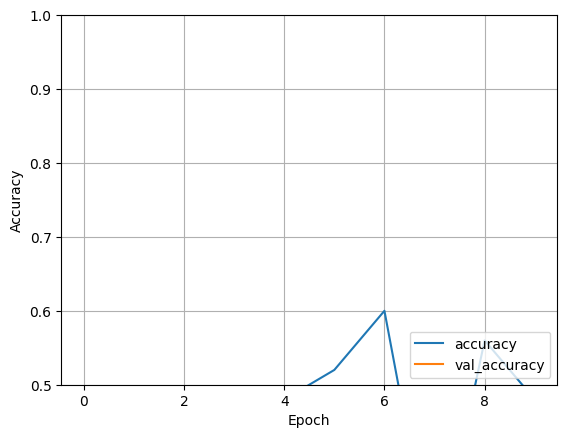

In [37]:
# Tampilkan grafik hasil pelatihan CNN dan validasi dengan Data Uji
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid()

In [38]:
# Evaluasi modelnya
test_loss, test_acc = model.evaluate(X_uji, y_uji, verbose=2)
# Tampilkan hasil tes akurasi
print('Hasil akurasi pengujian =',test_acc)

1/1 - 4s - 4s/step - accuracy: 0.2000 - loss: 2.7058
Hasil akurasi pengujian = 0.20000000298023224


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


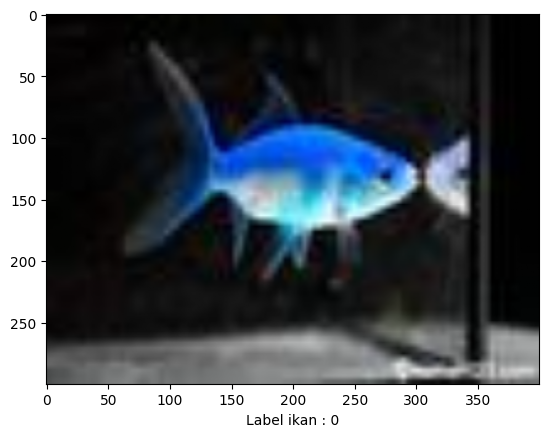

Hasil prediksi model: 1


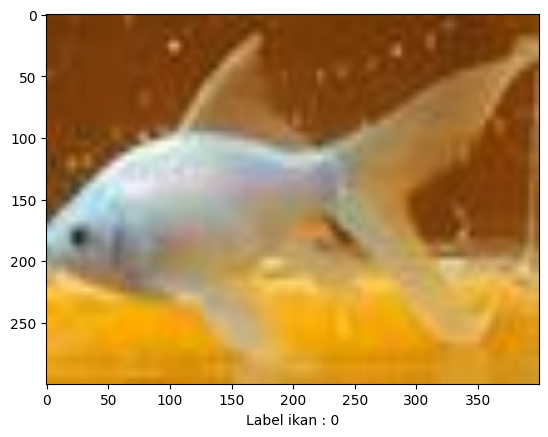

Hasil prediksi model: 0


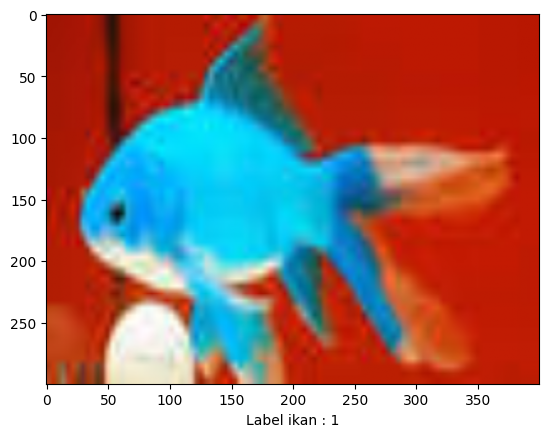

Hasil prediksi model: 0


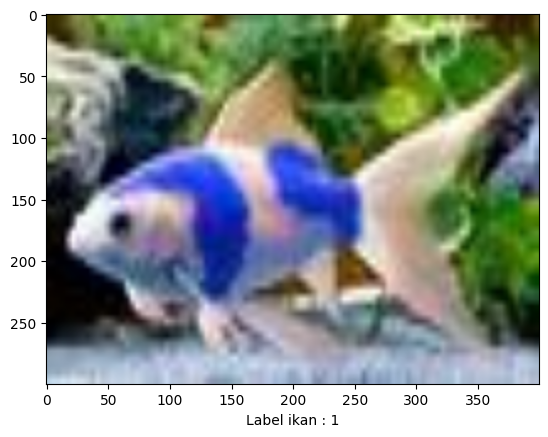

Hasil prediksi model: 0


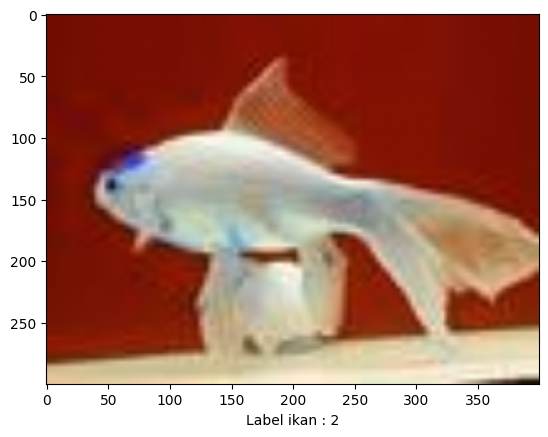

Hasil prediksi model: 0


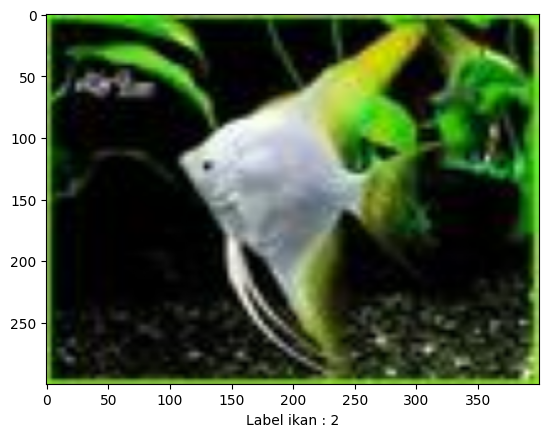

Hasil prediksi model: 1


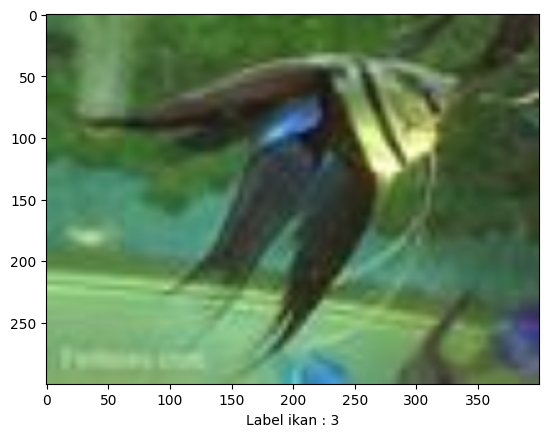

Hasil prediksi model: 1


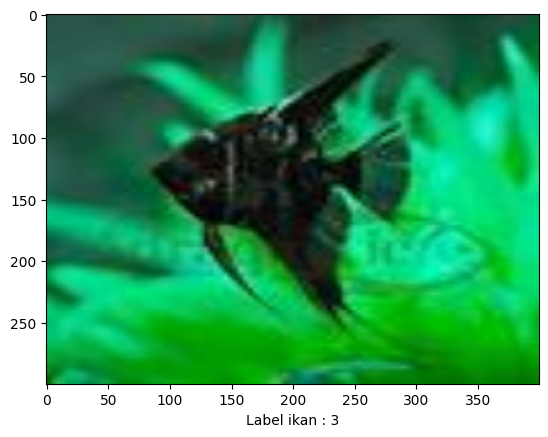

Hasil prediksi model: 3


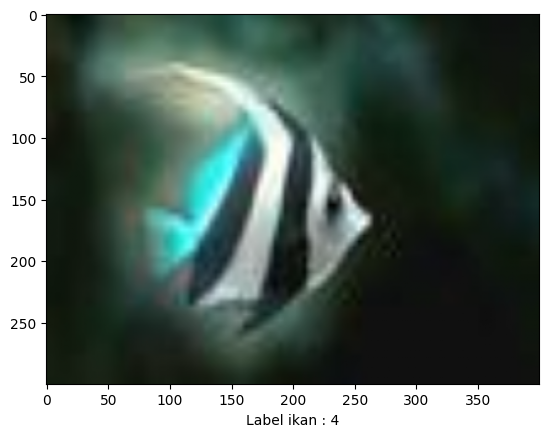

Hasil prediksi model: 1


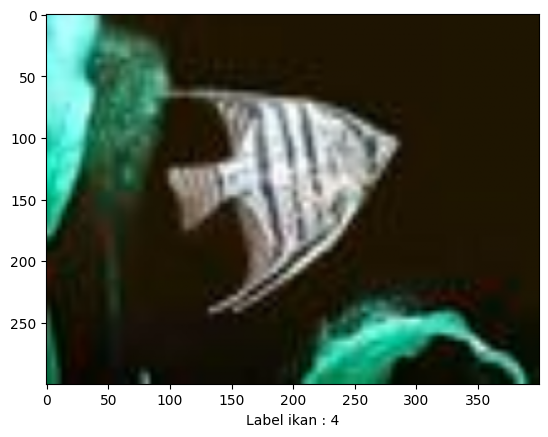

Hasil prediksi model: 1


In [39]:
# Visualisasikan hasil prediksi pengenalan ikan.
import matplotlib.pyplot as plt

# Memprediksi 10 gambar dari Data Uji.

n_images = 10
test_images = X_uji[:n_images]
test_label = y_uji[:n_images]
predictions = model.predict(test_images)

# Menampilkan gambar dan prediksi model.

for i in range(n_images):
 plt.imshow(test_images[i])
 plt.xlabel("Label ikan : %i" % test_label[i])
 plt.show()
 print("Hasil prediksi model: %i" % np.argmax(predictions[i]))